## Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

import warnings 

In [2]:
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("dress.csv")
df.head()

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...


In [4]:
df.isna().sum()

_unit_id               0
category               0
category:confidence    0
image_url              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15702 entries, 0 to 15701
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _unit_id             15702 non-null  int64  
 1   category             15702 non-null  object 
 2   category:confidence  15702 non-null  float64
 3   image_url            15702 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 490.8+ KB


In [6]:
df.corr()

,_unit_id,category:confidence
_unit_id,1.000000,0.003979
category:confidence,0.003979,1.000000


## Kmean Clustering

Algoritma ini menemukan kelompok data dengan nilai squared error antara rata-rata empiris dari cluster dan point di cluster minimum. Algoritma ini termasuk dalam clustering dengan pendekatan partitional. K == cluster harus ditentukan. Centroid pada umumnya dipilih secara random. Biasanya centroid merupakan rata-rata dari point pada cluster. Untuk menentukan setiap data point masuk ke cluster mana, digunakan pengukuran kedekatan(jarak) dengan Euclidean distance,cosine similarity, korelasi, dan lain sebagainya.

In [7]:
points = df[['category:confidence', '_unit_id']]
points = points.values
#print(points)

In [8]:
from sklearn.preprocessing import StandardScaler

df_subset = df[["category:confidence","_unit_id"]]

ss = StandardScaler()
x_scaled = ss.fit_transform(df_subset)

In [9]:
model =KMeans(n_clusters=5)
model.fit(points)

KMeans(n_clusters=5)

In [10]:
# Lakukan fit terhadap model
model.fit(x_scaled)
# Tentukan label untuk cluster
labels = model.labels_
print(labels)

[1 0 3 ... 4 4 2]


In [11]:
# Lakukan fit terhadap model
model.fit(x_scaled)
# Tentukan label untuk cluster
labels = model.labels_
print(labels)

[1 0 3 ... 2 2 4]


In [12]:
y = model.fit_predict(points)
print(y)

[3 3 3 ... 1 1 2]


In [13]:
#menampung koordinat dari tiap centroid
centroid = model.cluster_centers_

centroid_x = centroid[:,0]
centroid_y = centroid[:,1]

In [14]:
centroid

array([[8.60526958e-01, 8.51518997e+08],
       [8.60725000e-01, 8.54497400e+08],
       [9.61800000e-01, 8.56388654e+08],
       [8.53607232e-01, 8.51508144e+08],
       [8.56053354e-01, 8.51513603e+08]])

### Melihat Centroid yang telah dibuat

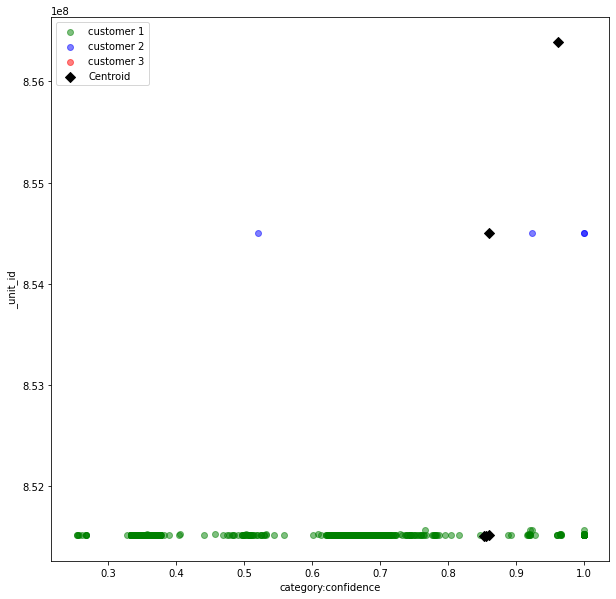

In [15]:
# xs = points.iloc[:,0]
# ys = points.iloc[:,1]

centroids = model.cluster_centers_

centroid_x = centroids[:,0]
centroid_y = centroids[:,1]

plt.figure(figsize=(10,10))
plt.scatter(points[y==0,0],points[y==0,1], c='green', label='customer 1', alpha=0.5)
plt.scatter(points[y==1,0],points[y==1,1], c='blue', label='customer 2', alpha=0.5)
plt.scatter(points[y==2,0],points[y==2,1], c='red', label='customer 3', alpha=0.5)
#plt.scatter(points[y==3,0],points[y==3,1], c='purple', label='customer 4',alpha=0.5)
#plt.scatter(points[y==4,0],points[y==4,1], c='orange', label='customer 5',alpha=0.5)

plt.scatter(centroid_x, centroid_y, marker="D", s=50, label="Centroid", c='black')
plt.xlabel("category:confidence")
plt.ylabel("_unit_id")
plt.legend()
plt.show()


### Menentukan Jumlah Cluster (Elbow Method)

In [16]:
cluster = range(1,7)
inertias = []

for n in cluster :
    model = KMeans(n_clusters=n)
    model.fit(points)
    inertias.append(model.inertia_)

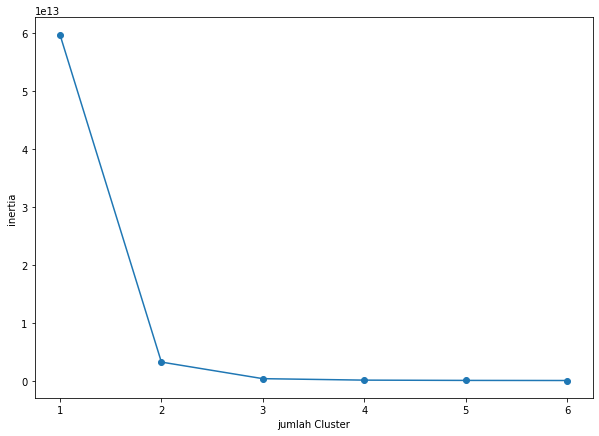

In [17]:
plt.figure(figsize = (10,7))
plt.plot(cluster, inertias, '-o')
plt.xlabel("jumlah Cluster")
plt.ylabel("inertia")
plt.xticks(cluster)
plt.show()

## Hierarchical Clustering

Algoritma ini menghasilkan sekumpulan cluster bersarang dalam bentuk hirarki pohon. Algoritma ini dapat divisualisasikan menggunakan dendogram atau bubble. Algoritma ini tidak harus menentukan jumlah cluster. Jumlah cluster yang diinginkan didapatkan dengan memotong dendogram pada level yang tepat.


#### AgglomerativeClustering

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage, complete


from sklearn.cluster import AgglomerativeClustering

#Buat objek dari AgglomerativeClustering dengan jumlah cluster : 3
hc_cluster = AgglomerativeClustering(n_clusters=3)

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
linkage_hr = linkage(points, method='ward')

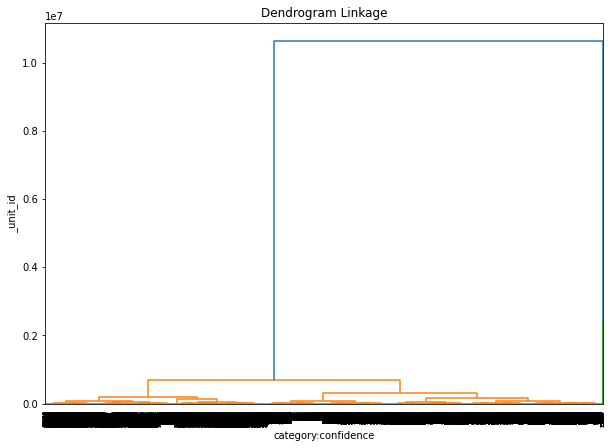

In [21]:
plt.figure(figsize=(10,7))
dendrogram(linkage_hr)
plt.title("Dendrogram Linkage")
plt.xlabel("category:confidence")
plt.ylabel("_unit_id")
plt.show()

In [22]:
hr_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [23]:
hr_predict = hr_cluster.fit_predict(points)

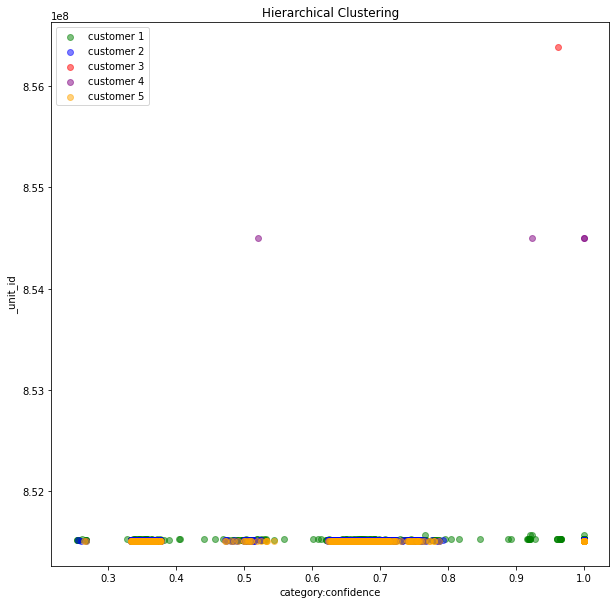

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(points[hr_predict==0,0],points[hr_predict==0,1], c='green', label='customer 1', alpha=0.5)
plt.scatter(points[hr_predict==1,0],points[hr_predict==1,1], c='blue', label='customer 2', alpha=0.5)
plt.scatter(points[hr_predict==2,0],points[hr_predict==2,1], c='red', label='customer 3', alpha=0.5)
plt.scatter(points[hr_predict==3,0],points[hr_predict==3,1], c='purple', label='customer 4',alpha=0.5)
plt.scatter(points[hr_predict==4,0],points[hr_predict==4,1], c='orange', label='customer 5',alpha=0.5)

plt.title("Hierarchical Clustering")
plt.xlabel("category:confidence")
plt.ylabel("_unit_id")
plt.legend()
plt.show()
